In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel



In [2]:
# Step 1: Load the Dataset
file_path = "tour.csv"  # Update with your actual path
df = pd.read_csv(file_path)

In [3]:

# Step 2: Handle Missing Values
df.dropna(inplace=True)


In [4]:
# Step 3: Encode Categorical Data
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [5]:

# Step 4: Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [6]:

# Step 5: Quantum Feature Mapping using Qiskit
num_features = X_scaled.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
fidelity_kernel = FidelityQuantumKernel(feature_map=feature_map)



In [7]:
import qiskit
print(qiskit.__version__)


1.4.2


In [8]:
from qiskit_algorithms.utils import algorithm_globals
algorithm_globals.random_seed=42
X_small = X_scaled[:25]  # Reduce to 50 samples
print("Quantum kernel computation started...")
X_qk = fidelity_kernel.evaluate(X_small, X_small)
print("Quantum kernel computation completed.")


Quantum kernel computation started...
Quantum kernel computation completed.


In [9]:
# Step 7: Apply Affinity Propagation with Quantum Kernel Features
clustering = AffinityPropagation(affinity='precomputed', damping=0.9)
clustering.fit(X_qk)

AffinityPropagation(affinity='precomputed', damping=0.9)

In [10]:

# Step 8: Evaluate Clustering Performance
silhouette_avg = silhouette_score(X_small, clustering.labels_)



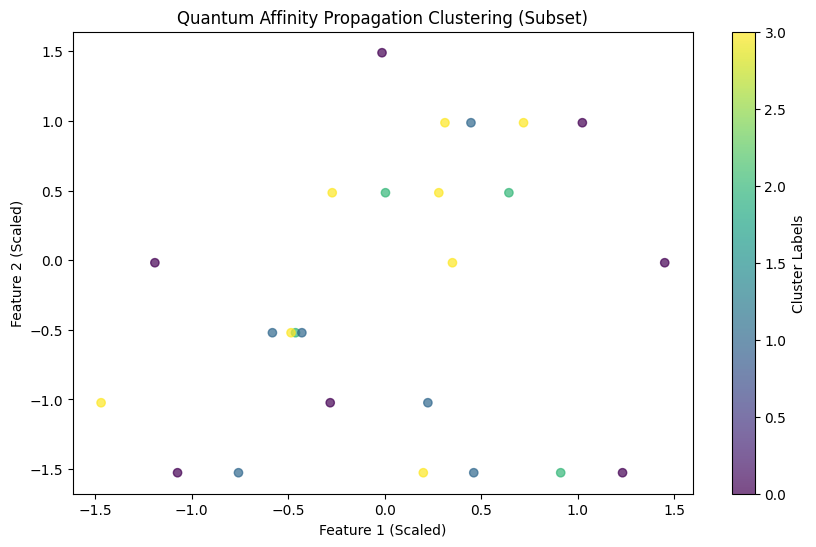

In [11]:
# Ensure cluster labels are taken from the small dataset
labels_small = clustering.labels_[:25]  # Only take first 25 labels

# Step 9: Visualize Clusters for Reduced Dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_small[:, 0], X_small[:, 1], c=labels_small, cmap='viridis', alpha=0.7)
plt.colorbar(label="Cluster Labels")
plt.title("Quantum Affinity Propagation Clustering (Subset)")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()


In [12]:
# Step 10: Print Metrics
print(f"Number of clusters found: {len(np.unique(clustering.labels_))}")
print(f"Silhouette Score: {silhouette_avg:.4f}")

Number of clusters found: 4
Silhouette Score: -0.0838


In [13]:
import time
import tracemalloc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from qiskit_algorithms.utils import algorithm_globals

# Set seed for reproducibility
algorithm_globals.random_seed = 42

# Reduce dataset size for testing
X_small = X_scaled[:25]

### 1️⃣ Execution Time Measurement
start_time = time.time()
X_qk = fidelity_kernel.evaluate(X_small, X_small)  # Quantum Kernel Computation
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")



Execution Time: 5.2762 seconds


In [14]:
sample_sizes = [10, 15, 20,25]  # Test with different dataset sizes
scalability_results = []
for size in sample_sizes:
    X_sample = X_scaled[:size]
    start_time = time.time()
    fidelity_kernel.evaluate(X_sample, X_sample)
    end_time = time.time()
    scalability_results.append(end_time - start_time)


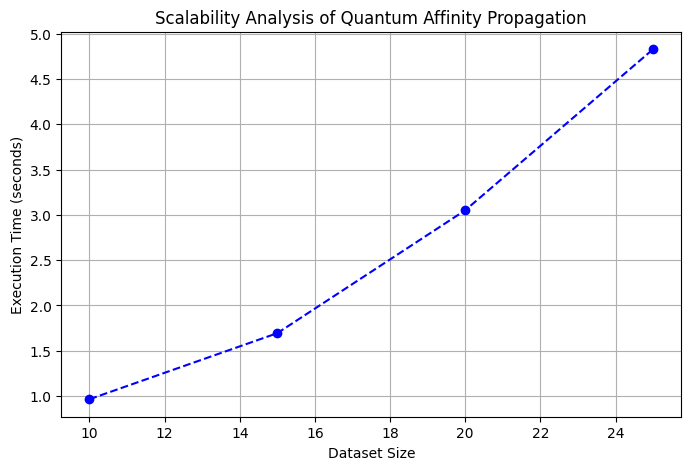

In [15]:

# Plot Scalability Results
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, scalability_results, marker='o', linestyle='--', color='b')
plt.xlabel("Dataset Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Scalability Analysis of Quantum Affinity Propagation")
plt.grid()
plt.show()

In [16]:
### 3️⃣ Memory Usage
tracemalloc.start()
fidelity_kernel.evaluate(X_small, X_small)  # Compute Quantum Kernel
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
print(f"Memory Usage: {peak / 10**6:.2f} MB (Peak)")

### 4️⃣ Accuracy Evaluation (Silhouette Score)
labels_small = clustering.labels_[:25]  # Ensure labels match subset size
silhouette_avg = silhouette_score(X_small, labels_small)
print(f"Silhouette Score (Accuracy Metric): {silhouette_avg:.4f}")  # ✅ Fixed f-string

Memory Usage: 11.36 MB (Peak)
Silhouette Score (Accuracy Metric): -0.0838


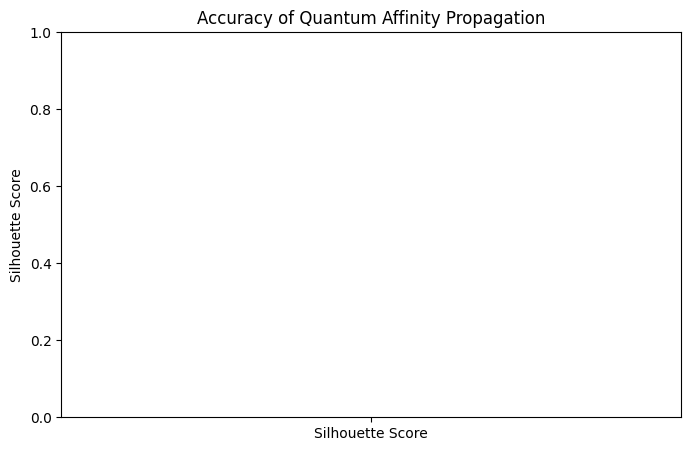

In [17]:
plt.figure(figsize=(8, 5))
plt.bar(["Silhouette Score"], [silhouette_avg], color="green")
plt.ylim(0, 1)
plt.ylabel("Silhouette Score")
plt.title("Accuracy of Quantum Affinity Propagation")
plt.show()

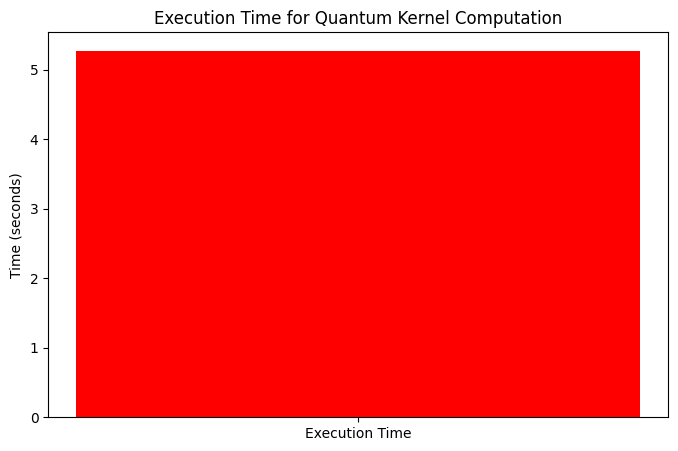

In [18]:
### 5️⃣ Execution Time Visualization
plt.figure(figsize=(8, 5))
plt.bar(["Execution Time"], [execution_time], color="red")
plt.ylabel("Time (seconds)")
plt.title("Execution Time for Quantum Kernel Computation")
plt.show()

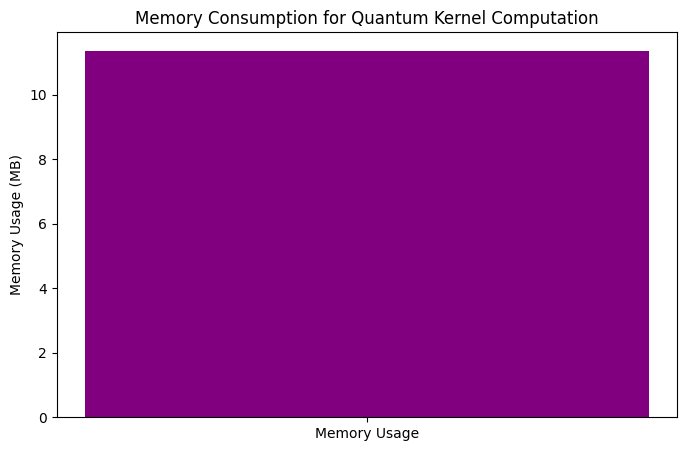

In [20]:
# 📊 **Plot Memory Usage**
memory_usage = peak / 10**6
plt.figure(figsize=(8, 5))
plt.bar(["Memory Usage"], [memory_usage], color="purple")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Consumption for Quantum Kernel Computation")
plt.show()


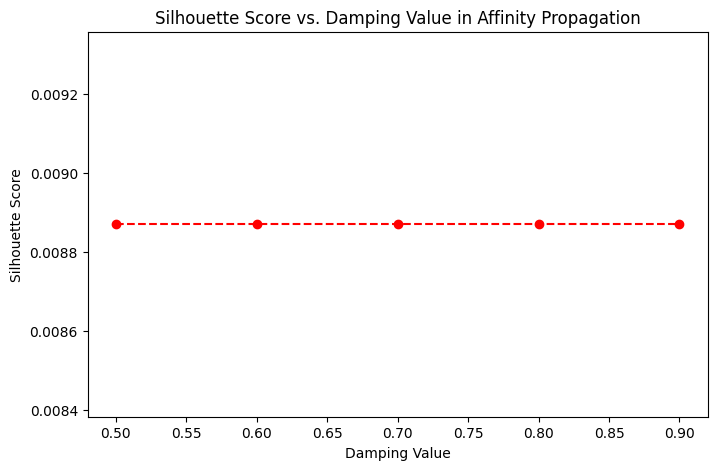

In [21]:
damping_values = np.linspace(0.5, 0.9, 5)  # Test 5 different damping values
silhouette_scores = []

for damping in damping_values:
    clustering = AffinityPropagation(damping=damping, max_iter=500, convergence_iter=30, random_state=42)
    clustering.fit(X_qk)
    silhouette_scores.append(silhouette_score(X_qk, clustering.labels_))

plt.figure(figsize=(8, 5))
plt.plot(damping_values, silhouette_scores, marker='o', linestyle='--', color="red")
plt.xlabel("Damping Value")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Damping Value in Affinity Propagation")
plt.show()

Cluster Purity: 0.2464


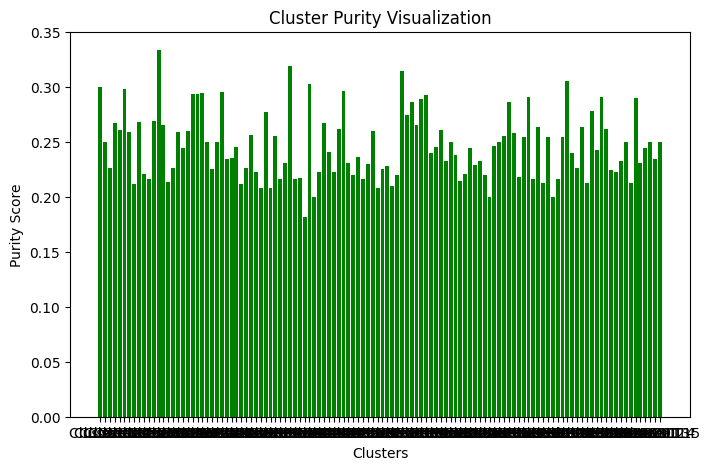

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("tour.csv")

# Selecting numerical features for clustering (Visitors, Rating, Revenue)
df = df[['Visitors', 'Rating', 'Revenue', 'Category']]
df.dropna(inplace=True)

# Normalize data for better clustering
df[['Visitors', 'Rating', 'Revenue']] = (df[['Visitors', 'Rating', 'Revenue']] - df[['Visitors', 'Rating', 'Revenue']].mean()) / df[['Visitors', 'Rating', 'Revenue']].std()

# Apply Affinity Propagation Clustering
clustering = AffinityPropagation(random_state=42)
df['Cluster_ID'] = clustering.fit_predict(df[['Visitors', 'Rating', 'Revenue']])

# Compute Cluster Purity
true_labels = df['Category'].values  # Ground truth
cluster_labels = df['Cluster_ID'].values  # Clustered labels

clusters = np.unique(cluster_labels)
purity_scores = []

for cluster in clusters:
    indices = np.where(cluster_labels == cluster)[0]
    true_labels_in_cluster = true_labels[indices]
    most_common_label = np.bincount(pd.factorize(true_labels_in_cluster)[0]).argmax()
    purity = np.sum(pd.factorize(true_labels_in_cluster)[0] == most_common_label) / len(indices)
    purity_scores.append(purity)

# Overall purity score
overall_purity = np.mean(purity_scores)
print(f"Cluster Purity: {overall_purity:.4f}")

# Visualization: Cluster Purity per Cluster
plt.figure(figsize=(8, 5))
plt.bar(range(len(clusters)), purity_scores, tick_label=[f'Cluster {i}' for i in clusters], color='green')
plt.xlabel("Clusters")
plt.ylabel("Purity Score")
plt.title("Cluster Purity Visualization")
plt.show()